In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_kddcup99

plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['axes.grid'] = True

# Cybersecurity Regression Datasets

This repository provides two synthetic datasets designed for regression modeling tasks in the cybersecurity domain. Each dataset includes **1,000 samples** with clearly defined data-generating processes and added Gaussian noise.

---

### Dataset B: Three Features

**File:** `cyber_risk_3features.csv`

- **Features:**
  - `failed_login_attempts` (integer): Same distribution as in Dataset A (Poisson λ = 2, truncated at [0, 20]).  
  - `password_age_days` (float): Days since the last password change, sampled from a Uniform(0, 365).  
  - `phishing_click_rate` (float): Simulated proportion of phishing links clicked, drawn from a Beta(2, 8) distribution.

- **Target (risk_score):**  
  Defined by the following regression model with an interaction term:

  \[
  \text{risk\_score} = 10 + 2.5x_1 + 0.02x_2 + 20x_3 + 0.5(x_1 \cdot x_3) + \varepsilon,
  \quad \varepsilon \sim \mathcal{N}(0, 3^2)
  \]

  where \(x_1 =\) failed login attempts, \(x_2 =\) password age in days, and \(x_3 =\) phishing click rate.  
  Values are clipped to [0, 100].

---


## 2. Load the Dataset

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 데이터 불러오기
path = "./data/cyber_risk_3features.csv"
num_df = pd.read_csv(path)

# 세 개의 feature 선택
feature_cols = ["failed_login_attempts", "password_age_days", "phishing_click_rate"]
target_col = "risk_score"

# Feature와 Target 분리
X = num_df[feature_cols].values
y = num_df[target_col].values

# 1. Train-Test Split (예: 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 3. Descriptive Statistics: Mean, Median, Mode

In [10]:
mean_vals = num_df.mean(numeric_only=True)
median_vals = num_df.median(numeric_only=True)
mode_vals = num_df.mode(numeric_only=True)

print('Mean (first 10):\n', mean_vals.head(10))
print('\nMedian (first 10):\n', median_vals.head(10))
print('\nMode (first row, first 10 cols):\n', mode_vals.iloc[0].head(10))

Mean (first 10):
 failed_login_attempts      1.895000
password_age_days        183.890971
phishing_click_rate        0.194854
risk_score                22.437270
dtype: float64

Median (first 10):
 failed_login_attempts      2.000000
password_age_days        186.913313
phishing_click_rate        0.172935
risk_score                22.342993
dtype: float64

Mode (first row, first 10 cols):
 failed_login_attempts    1.000000
password_age_days        0.348697
phishing_click_rate      0.003980
risk_score               6.973616
Name: 0, dtype: float64


## 4. Range, Variance, Coefficient of Variation (CV), Percentiles

In [11]:
min_vals = num_df.min(numeric_only=True)
max_vals = num_df.max(numeric_only=True)
range_vals = max_vals - min_vals
var_vals = num_df.var(numeric_only=True)
std_vals = num_df.std(numeric_only=True)
cv_vals = std_vals / mean_vals.replace(0, np.nan)  # avoid division by zero
percentiles = num_df.quantile([0.25, 0.5, 0.75], numeric_only=True)

print('Range (first 10):\n', range_vals.head(10))
print('\nVariance (first 10):\n', var_vals.head(10))
print('\nCoefficient of Variation (first 10):\n', cv_vals.head(10))
print('\nPercentiles (25%, 50%, 75%):')
display(percentiles)

Range (first 10):
 failed_login_attempts      7.000000
password_age_days        364.642916
phishing_click_rate        0.720038
risk_score                38.933910
dtype: float64

Variance (first 10):
 failed_login_attempts        1.877853
password_age_days        11193.826640
phishing_click_rate          0.014322
risk_score                  32.805227
dtype: float64

Coefficient of Variation (first 10):
 failed_login_attempts    0.723139
password_age_days        0.575346
phishing_click_rate      0.614183
risk_score               0.255271
dtype: float64

Percentiles (25%, 50%, 75%):


,failed_login_attempts,password_age_days,phishing_click_rate,risk_score
0.25,1.0,95.155225,0.101603,18.191386
0.50,2.0,186.913313,0.172935,22.342993
0.75,3.0,271.307284,0.268148,26.179549


## 5. Box Plot & Violin Plot (First Few Features)

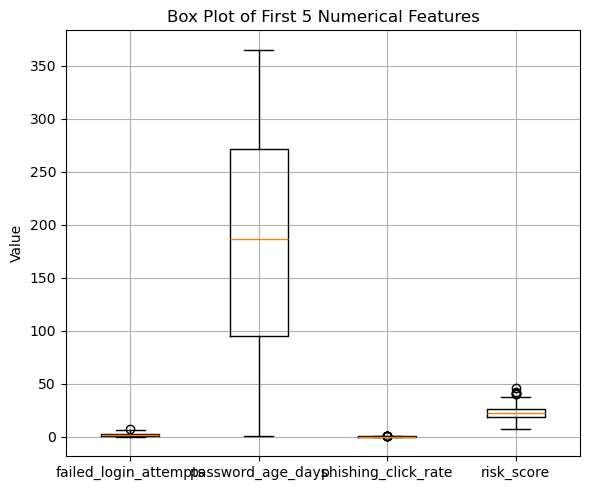

In [12]:
# Select a small subset of numeric columns for visualization
viz_cols = list(num_df.columns[:5])
subset = num_df[viz_cols]

# Box plot
plt.figure()
plt.boxplot([subset[col].dropna().values for col in viz_cols], labels=viz_cols, vert=True)
plt.title('Box Plot of First 5 Numerical Features')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

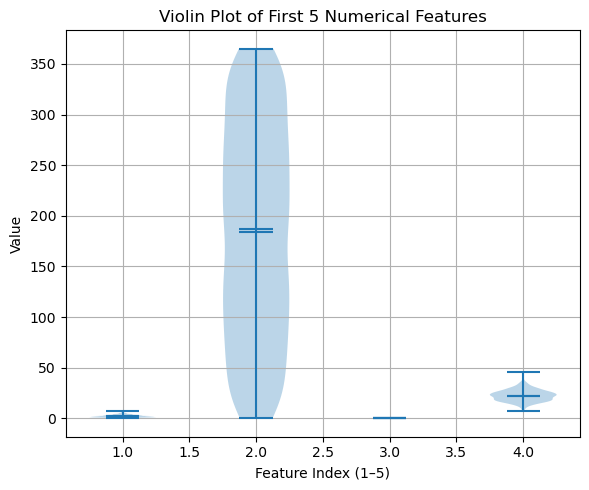

Index 1 -> failed_login_attempts
Index 2 -> password_age_days
Index 3 -> phishing_click_rate
Index 4 -> risk_score


In [13]:
# Violin plot
plt.figure()
plt.violinplot([subset[col].dropna().values for col in viz_cols], showmeans=True, showextrema=True, showmedians=True)
plt.title('Violin Plot of First 5 Numerical Features')
plt.xlabel('Feature Index (1–5)')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Optional: map indices to feature names for clarity
for i, name in enumerate(viz_cols, start=1):
    print(f'Index {i} -> {name}')

## 6. Covariance Matrix & Correlation Matrix

In [14]:
cov_matrix = num_df.cov(numeric_only=True)
corr_matrix = num_df.corr(numeric_only=True)
display(cov_matrix)

,failed_login_attempts,password_age_days,phishing_click_rate,risk_score
failed_login_attempts,1.877853,2.928567,0.000538,5.094605
password_age_days,2.928567,11193.826640,-0.073036,238.214176
phishing_click_rate,0.000538,-0.073036,0.014322,0.289341
risk_score,5.094605,238.214176,0.289341,32.805227


### Heatmap Visualization (Correlation)

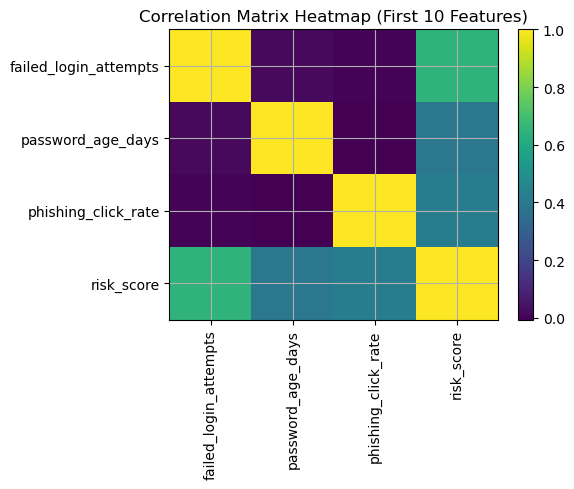

In [16]:
n = 4
fig = plt.figure()
plt.imshow(corr_matrix.values[:n,:n], aspect='auto')
plt.colorbar()
plt.xticks(ticks=range(n), labels=corr_matrix.columns[:n], rotation=90)
plt.yticks(ticks=range(n), labels=corr_matrix.index[:n])
plt.title('Correlation Matrix Heatmap (First 10 Features)')
plt.tight_layout()
plt.show()

# Security Data Exploration with `sklearn.datasets.fetch_kddcup99`


## Dataset Overview: KDD Cup 1999 & `fetch_kddcup99`

The **KDD Cup 1999** dataset is a widely used benchmark for **network intrusion detection** research. It contains simulated TCP/IP connection records labeled as either normal or one of multiple attack types (e.g., DoS, Probe, R2L, U2R). Each record aggregates connection-level features such as duration, bytes sent/received, count-based statistics, and protocol/service flags.

### `sklearn.datasets.fetch_kddcup99`
`fetch_kddcup99` is a utility in scikit-learn to download and load the KDD'99 dataset. Key arguments include:
- `as_frame`: If `True`, returns a `pandas.DataFrame` (with the full frame accessible via the `frame` attribute of the returned `Bunch`).
- `percent10`: If `True`, uses the 10% subset provided by KDD'99 (commonly used in experiments to reduce size).
- `subset`: Optional string to select certain service-specific subsets (e.g., `'SA'`, `'SF'`, `'http'`, `'smtp'`). If omitted, the full dataset portion is used (potentially large). Using a subset is useful for demonstrations and quicker iteration.

### Return Value
The loader returns a `Bunch` object with fields such as:
- `data`: Feature matrix (numeric and some categorical/byte-like fields).  
- `target`: Labels (e.g., `b'normal.'`, `b'smurf.'`, etc.).  
- `frame`: A `pandas.DataFrame` (present if `as_frame=True`).  
- `feature_names`: List of feature names.  
- `DESCR`: Textual description.

### Notes on Types & Preprocessing
- Many non-numeric columns in KDD'99 appear as **byte strings** (e.g., `b'tcp'`, `b'http'`). In this notebook we focus on **numeric columns** for statistics and visualization.  
- For modeling, you would typically **encode categorical fields** (e.g., one-hot encoding) and address **class imbalance**.


## 2. Load the Dataset

In [2]:
# Load 10% sample of the full dataset
bunch = fetch_kddcup99(percent10=True, as_frame=True)
df = bunch.frame.copy()

# Decode byte strings if needed
df = df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
num_df = df[numeric_cols]

print("Shape:", df.shape)
print("All columns:", df.columns)
print("Numeric columns:", list(numeric_cols))
num_df.head()

Shape: (494021, 42)
All columns: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')
Numeric columns: ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logi

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,181,5450,0,0,0,0,0,1,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,239,486,0,0,0,0,0,1,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,235,1337,0,0,0,0,0,1,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,219,1337,0,0,0,0,0,1,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,217,2032,0,0,0,0,0,1,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


## 3. Descriptive Statistics: Mean, Median, Mode

In [3]:
mean_vals = num_df.mean(numeric_only=True)
median_vals = num_df.median(numeric_only=True)
mode_vals = num_df.mode(numeric_only=True)

print('Mean (first 10):\n', mean_vals.head(10))
print('\nMedian (first 10):\n', median_vals.head(10))
print('\nMode (first row, first 10 cols):\n', mode_vals.iloc[0].head(10))

Mean (first 10):
 duration               47.979302
src_bytes            3025.610296
dst_bytes             868.532425
land                    0.000045
wrong_fragment          0.006433
urgent                  0.000014
hot                     0.034519
num_failed_logins       0.000152
logged_in               0.148247
num_compromised         0.010212
dtype: float64

Median (first 10):
 duration               0.0
src_bytes            520.0
dst_bytes              0.0
land                   0.0
wrong_fragment         0.0
urgent                 0.0
hot                    0.0
num_failed_logins      0.0
logged_in              0.0
num_compromised        0.0
dtype: float64

Mode (first row, first 10 cols):
 duration                0.0
src_bytes            1032.0
dst_bytes               0.0
land                    0.0
wrong_fragment          0.0
urgent                  0.0
hot                     0.0
num_failed_logins       0.0
logged_in               0.0
num_compromised         0.0
Name: 0, dtype: 

## 4. Range, Variance, Coefficient of Variation (CV), Percentiles

In [4]:
min_vals = num_df.min(numeric_only=True)
max_vals = num_df.max(numeric_only=True)
range_vals = max_vals - min_vals
var_vals = num_df.var(numeric_only=True)
std_vals = num_df.std(numeric_only=True)
cv_vals = std_vals / mean_vals.replace(0, np.nan)  # avoid division by zero
percentiles = num_df.quantile([0.25, 0.5, 0.75], numeric_only=True)

print('Range (first 10):\n', range_vals.head(10))
print('\nVariance (first 10):\n', var_vals.head(10))
print('\nCoefficient of Variation (first 10):\n', cv_vals.head(10))
print('\nPercentiles (25%, 50%, 75%):')
display(percentiles)

Range (first 10):
 duration                 58329.0
src_bytes            693375640.0
dst_bytes              5155468.0
land                         1.0
wrong_fragment               3.0
urgent                       3.0
hot                         30.0
num_failed_logins            5.0
logged_in                    1.0
num_compromised            884.0
dtype: float64

Variance (first 10):
 duration             5.009051e+05
src_bytes            9.765750e+11
dst_bytes            1.091642e+09
land                 4.453063e-05
wrong_fragment       1.817245e-02
urgent               3.036294e-05
hot                  6.116844e-01
num_failed_logins    2.408579e-04
logged_in            1.262699e-01
num_compromised      3.233977e+00
dtype: float64

Coefficient of Variation (first 10):
 duration              14.751079
src_bytes            326.617774
dst_bytes             38.041183
land                 149.848408
wrong_fragment        20.955514
urgent               388.883304
hot                   22.65

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0.25,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,46.0,0.41,0.00,0.0,0.0,0.0,0.0,0.0,0.0
0.50,0.0,520.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0
0.75,0.0,1032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.04,1.0,0.0,0.0,0.0,0.0,0.0


## 5. Box Plot & Violin Plot (First Few Features)

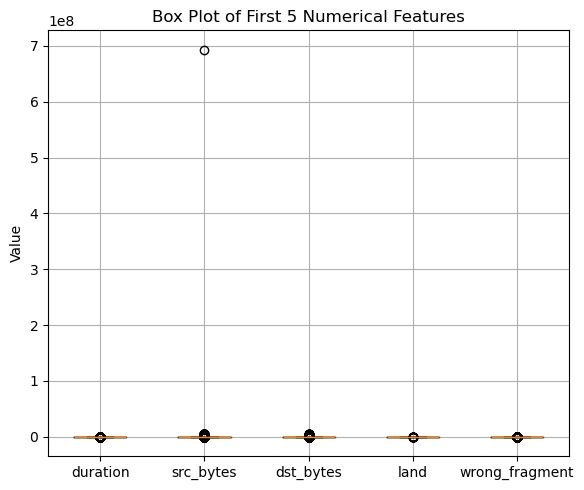

In [5]:
# Select a small subset of numeric columns for visualization
viz_cols = list(num_df.columns[:5])
subset = num_df[viz_cols]

# Box plot
plt.figure()
plt.boxplot([subset[col].dropna().values for col in viz_cols], labels=viz_cols, vert=True)
plt.title('Box Plot of First 5 Numerical Features')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

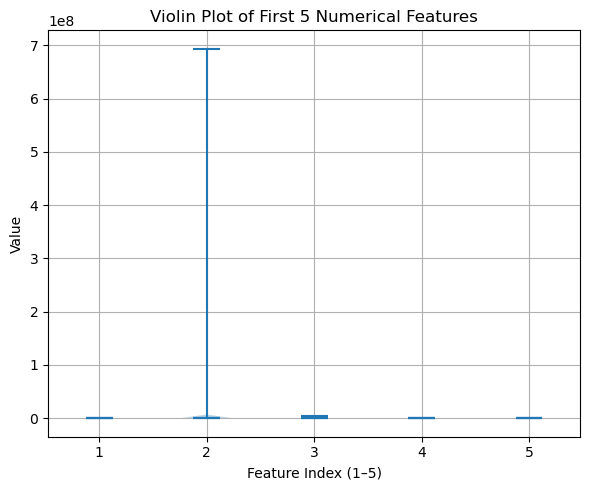

Index 1 -> duration
Index 2 -> src_bytes
Index 3 -> dst_bytes
Index 4 -> land
Index 5 -> wrong_fragment


In [6]:
# Violin plot
plt.figure()
plt.violinplot([subset[col].dropna().values for col in viz_cols], showmeans=True, showextrema=True, showmedians=True)
plt.title('Violin Plot of First 5 Numerical Features')
plt.xlabel('Feature Index (1–5)')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

# Optional: map indices to feature names for clarity
for i, name in enumerate(viz_cols, start=1):
    print(f'Index {i} -> {name}')

## 6. Covariance Matrix & Correlation Matrix

In [7]:
cov_matrix = num_df.cov(numeric_only=True)
corr_matrix = num_df.corr(numeric_only=True)
display(cov_matrix)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,5.009051e+05,2.978240e+06,1.271978e+05,-2.136644e-03,-3.086479e-01,1.476488e-02,7.313756,5.754332e-02,-4.342084,7.394096e+01,...,461.616865,-8819.476962,-34.439103,3.141305e+01,14.525916,-2.082204e-01,-8.188703,-8.252919e+00,1.099824e+00,1.704491e+00
src_bytes,2.978240e+06,9.765750e+11,-5.213577e+04,-1.347383e-01,-1.852220e+01,-2.730106e-02,3464.730164,-4.200898e-01,597.197018,2.106698e+02,...,-111494.775148,-336582.364610,-833.180761,6.240956e+01,-344.235584,4.936146e+01,-270.163318,4.223919e+02,-8.948366e+01,3.021068e+02
dst_bytes,1.271978e+05,-5.213577e+04,1.091642e+09,-3.867802e-02,-5.586875e+00,2.965304e+00,112.807315,2.529478e+01,561.367681,1.384287e+03,...,-104539.609132,-20494.224429,95.797588,-1.918296e+01,-320.328723,1.212008e+01,-142.519374,-1.413977e+02,-3.809051e+01,-4.159919e+01
land,-2.136644e-03,-1.347383e-01,-3.867802e-02,4.453063e-05,-2.864749e-07,-6.310021e-10,-0.000002,-6.760736e-09,-0.000007,-4.547722e-07,...,-0.010227,-0.008199,0.000005,-2.427555e-07,0.000012,2.342610e-05,0.000032,1.981349e-05,-2.324982e-06,-2.556691e-06
wrong_fragment,-3.086479e-01,-1.852220e+01,-5.586875e+00,-2.864749e-07,1.817245e-02,-9.115112e-08,-0.000222,-9.766191e-07,-0.000954,-6.569391e-05,...,-0.045306,-0.838020,-0.003040,1.058361e-03,-0.002063,6.868109e-05,-0.000979,-1.135044e-03,9.255136e-04,-3.693257e-04
urgent,1.476488e-02,-2.730106e-02,2.965304e+00,-6.310021e-10,-9.115112e-08,3.036294e-05,0.000002,1.214311e-05,0.000012,1.415500e-04,...,-0.002547,-0.002653,-0.000007,6.343184e-06,-0.000005,-9.470165e-08,-0.000003,-2.500098e-06,-8.234956e-07,-8.134927e-07
hot,7.313756e+00,3.464730e+03,1.128073e+02,-1.537211e-06,-2.220571e-04,1.535097e-06,0.611684,1.060910e-04,0.029266,1.033532e-02,...,-1.335131,-3.212078,-0.009354,1.127172e-04,-0.019922,-1.472081e-04,-0.005802,-6.018149e-03,-1.179587e-03,-1.394703e-03
num_failed_logins,5.754332e-02,-4.200898e-01,2.529478e+01,-6.760736e-09,-9.766191e-07,1.214311e-05,0.000106,2.408579e-04,-0.000006,1.927738e-04,...,-0.025566,-0.025365,0.000003,1.724769e-06,-0.000071,1.046261e-05,-0.000011,-1.449981e-05,8.858180e-05,8.423571e-05
logged_in,-4.342084e+00,5.971970e+02,5.613677e+02,-6.601814e-06,-9.536620e-04,1.206889e-05,0.029266,-6.312508e-06,0.126270,8.698221e-03,...,-14.287973,4.495881,0.023511,-2.374181e-03,-0.078941,2.103418e-03,-0.025825,-2.594860e-02,-7.445629e-03,-7.187196e-03
num_compromised,7.394096e+01,2.106698e+02,1.384287e+03,-4.547722e-07,-6.569391e-05,1.415500e-04,0.010335,1.927738e-04,0.008698,3.233977e+00,...,-0.973489,-0.914761,-0.001909,7.062586e-05,-0.005812,4.706639e-05,-0.001354,-1.117248e-03,-3.496282e-04,-3.613049e-04


### Heatmap Visualization (Correlation)

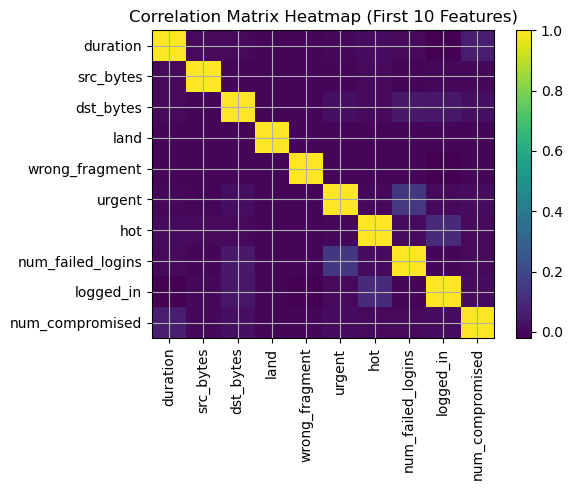

In [8]:
n = 10
fig = plt.figure()
plt.imshow(corr_matrix.values[:n,:n], aspect='auto')
plt.colorbar()
plt.xticks(ticks=range(n), labels=corr_matrix.columns[:n], rotation=90)
plt.yticks(ticks=range(n), labels=corr_matrix.index[:n])
plt.title('Correlation Matrix Heatmap (First 10 Features)')
plt.tight_layout()
plt.show()